In [1]:
!pip install biopython

In [2]:
from Bio import SeqIO

In [8]:
# Define the file path
file_name = '/test_data1.fastq'

# Define the template sequence
template_sequence = "ATCGATCGATAGCTAGCTTT"

In [9]:
def hamming_distance(seq1, seq2):
    """Calculate the Hamming distance between two sequences."""
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length.")
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

In [10]:
def read_fastq_and_calculate_hamming(file_path, template_sequence):
    """Read the FASTQ file and calculate the Hamming distance for each sequence against the template."""
    hamming_results = {}
    with open(file_path, "r") as fastq_file:
        for record in SeqIO.parse(fastq_file, "fastq"):
            seq_id = record.id
            sequence = str(record.seq)
            hamming_dist = hamming_distance(sequence, template_sequence)
            hamming_results[seq_id] = hamming_dist
    return hamming_results

In [12]:
sequence_hamming_distances = read_fastq_and_calculate_hamming(file_name, template_sequence)


In [14]:
# Output sequence IDs with their corresponding Hamming distances
for seq_id, ham_dist in sequence_hamming_distances.items():
    print(f"Sequence ID: {seq_id}, Hamming Distance: {ham_dist}")


Sequence ID: sequence1, Hamming Distance: 4
Sequence ID: sequence2, Hamming Distance: 4
Sequence ID: sequence3, Hamming Distance: 1
Sequence ID: sequence4, Hamming Distance: 2
Sequence ID: sequence5, Hamming Distance: 4
Sequence ID: sequence6, Hamming Distance: 2
Sequence ID: sequence7, Hamming Distance: 2
Sequence ID: sequence8, Hamming Distance: 3
Sequence ID: sequence9, Hamming Distance: 2
Sequence ID: sequence10, Hamming Distance: 4
Sequence ID: sequence11, Hamming Distance: 4
Sequence ID: sequence12, Hamming Distance: 5
Sequence ID: sequence13, Hamming Distance: 5
Sequence ID: sequence14, Hamming Distance: 1
Sequence ID: sequence15, Hamming Distance: 4
Sequence ID: sequence16, Hamming Distance: 3
Sequence ID: sequence17, Hamming Distance: 2
Sequence ID: sequence18, Hamming Distance: 4
Sequence ID: sequence19, Hamming Distance: 1
Sequence ID: sequence20, Hamming Distance: 1
Sequence ID: sequence21, Hamming Distance: 3
Sequence ID: sequence22, Hamming Distance: 2
Sequence ID: sequen

In [15]:
# Output just the Hamming distances
for distance in sequence_hamming_distances.values():
    print(distance)

4
4
1
2
4
2
2
3
2
4
4
5
5
1
4
3
2
4
1
1
3
2
4
4
1
1
1
3
1
5
5
1
5
4
2
5
4
2
1
3
3
2
4
4
5
2
1
5
3
3


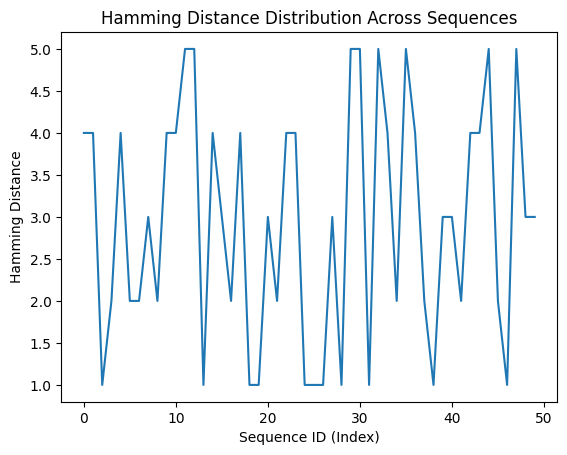

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(list(sequence_hamming_distances.values()))
plt.xlabel('Sequence ID (Index)')
plt.ylabel('Hamming Distance')
plt.title('Hamming Distance Distribution Across Sequences')
plt.show()

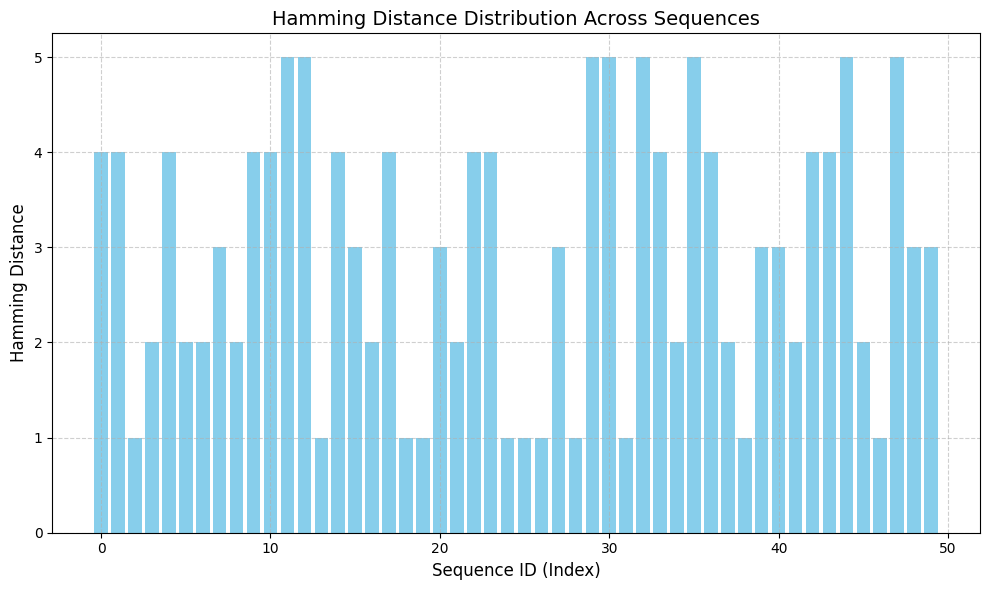

In [16]:
import matplotlib.pyplot as plt

# Improved plot for visualizing Hamming distances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sequence_hamming_distances)), list(sequence_hamming_distances.values()), color='skyblue')

# Adding gridlines, labels, and title
plt.xlabel('Sequence ID (Index)', fontsize=12)
plt.ylabel('Hamming Distance', fontsize=12)
plt.title('Hamming Distance Distribution Across Sequences', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.tight_layout()
plt.show()


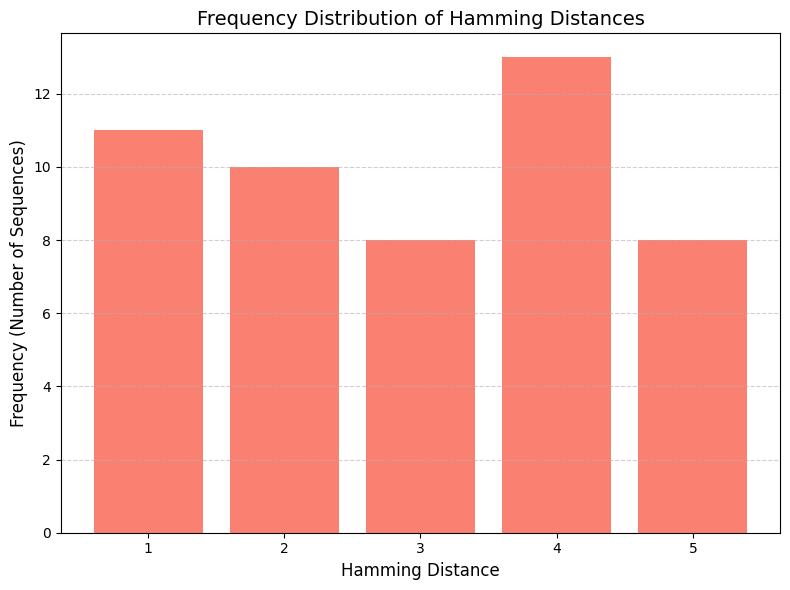

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the frequency of each Hamming distance
hamming_distances = list(sequence_hamming_distances.values())
hamming_dist_freq = Counter(hamming_distances)

# Extract the Hamming distances and their counts
distances = list(hamming_dist_freq.keys())
counts = list(hamming_dist_freq.values())

# Create a bar plot to show the frequency of different Hamming distances
plt.figure(figsize=(8, 6))
plt.bar(distances, counts, color='salmon')

# Adding labels, title, and grid
plt.xlabel('Hamming Distance', fontsize=12)
plt.ylabel('Frequency (Number of Sequences)', fontsize=12)
plt.title('Frequency Distribution of Hamming Distances', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


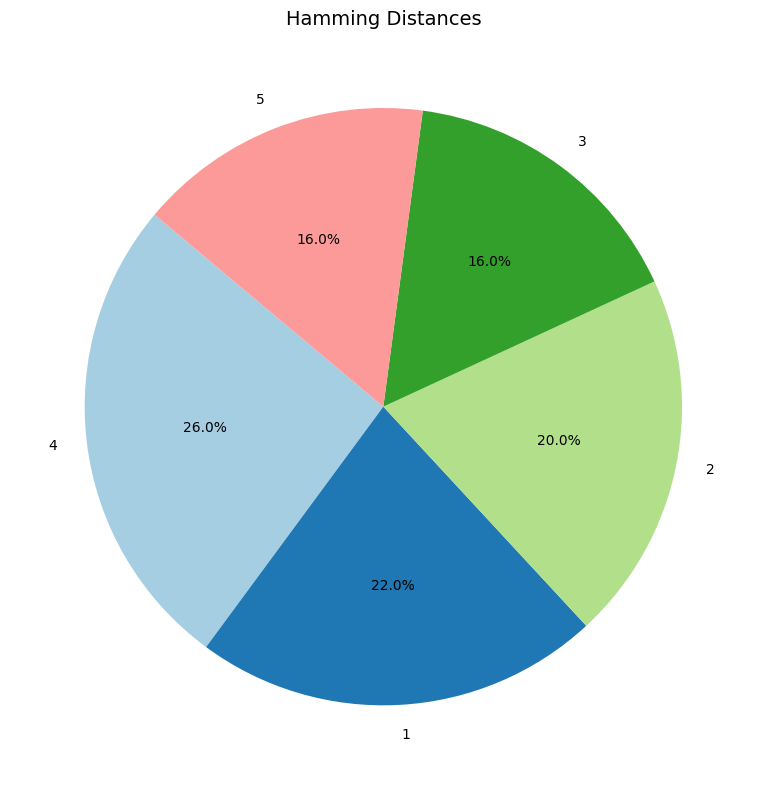

In [20]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the frequency of each Hamming distance
hamming_distances = list(sequence_hamming_distances.values())
hamming_dist_freq = Counter(hamming_distances)

# Extract Hamming distances and their counts
distances = list(hamming_dist_freq.keys())
counts = list(hamming_dist_freq.values())

# Calculate percentages for each Hamming distance
total_sequences = sum(counts)
percentages = [(count / total_sequences) * 100 for count in counts]

# Create a pie chart to show the distribution of Hamming distances
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=distances, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Hamming Distances', fontsize=14)

# Show the pie chart
plt.tight_layout()
plt.show()